In [39]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [40]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [41]:
data_dir

'.\\datasets\\flower_photos'

In [42]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [43]:
list(data_dir.glob('*/*.jpg'))[:5]  # List first 5 images

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [44]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [45]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

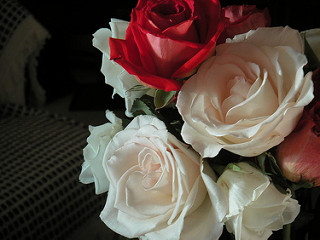

In [46]:
PIL.Image.open(str(roses[1]))

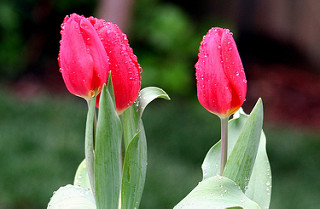

In [47]:
import PIL.Image


tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))


Read flowers images from disk into numpy array using opencv

In [48]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [49]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [50]:

flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [51]:

str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [52]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [53]:

img.shape

(240, 179, 3)

In [54]:

cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [55]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [56]:
X = np.array(X)
y = np.array(y)

Train test split

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Prepprocessing : scale images

In [58]:
X_train_scaled= X_train / 255.0
X_test_scaled = X_test / 255.0

CNN

In [59]:
num_classes = 5
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              


Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.3794 - loss: 1.4304
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.6136 - loss: 0.9849
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.6858 - loss: 0.8308
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.7851 - loss: 0.5794
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.8664 - loss: 0.3813
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 280ms/step - accuracy: 0.9357 - loss: 0.2007
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - accuracy: 0.9648 - loss: 0.1222
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.9786 - loss: 0.0837
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.9906 - loss: 0.0411
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.9905 - loss: 0.0346
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.9946 - loss: 0.0237
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10

In [60]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6735 - loss: 2.1706


[2.1677072048187256, 0.6655773520469666]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [61]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


array([[  8.541153  ,  24.155916  ,   4.8633165 , -18.226074  ,
         -0.05015071],
       [  7.0408726 ,   2.5304081 , -10.019055  ,  -8.84079   ,
          4.4701047 ],
       [  1.0685194 ,   7.967304  ,  16.594042  ,  -7.406784  ,
         -2.2203653 ],
       ...,
       [  0.93442565,  -0.1216749 ,  -4.7334437 ,   8.169996  ,
         11.544767  ],
       [  9.349324  ,   1.4369831 ,  -1.9007523 ,  -1.5212679 ,
         -1.7141913 ],
       [  1.3795781 ,  -9.160888  ,   1.2791722 ,   6.88858   ,
          6.1555805 ]], dtype=float32)

In [62]:

score = tf.nn.softmax(predictions[0])

In [63]:
np.argmax(score)

np.int64(1)

In [64]:
y_test[0]

np.int64(1)


Improve Test Accuracy Using Data Augmentation

In [65]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'